# Amplificador Diferencial con OA Ideal
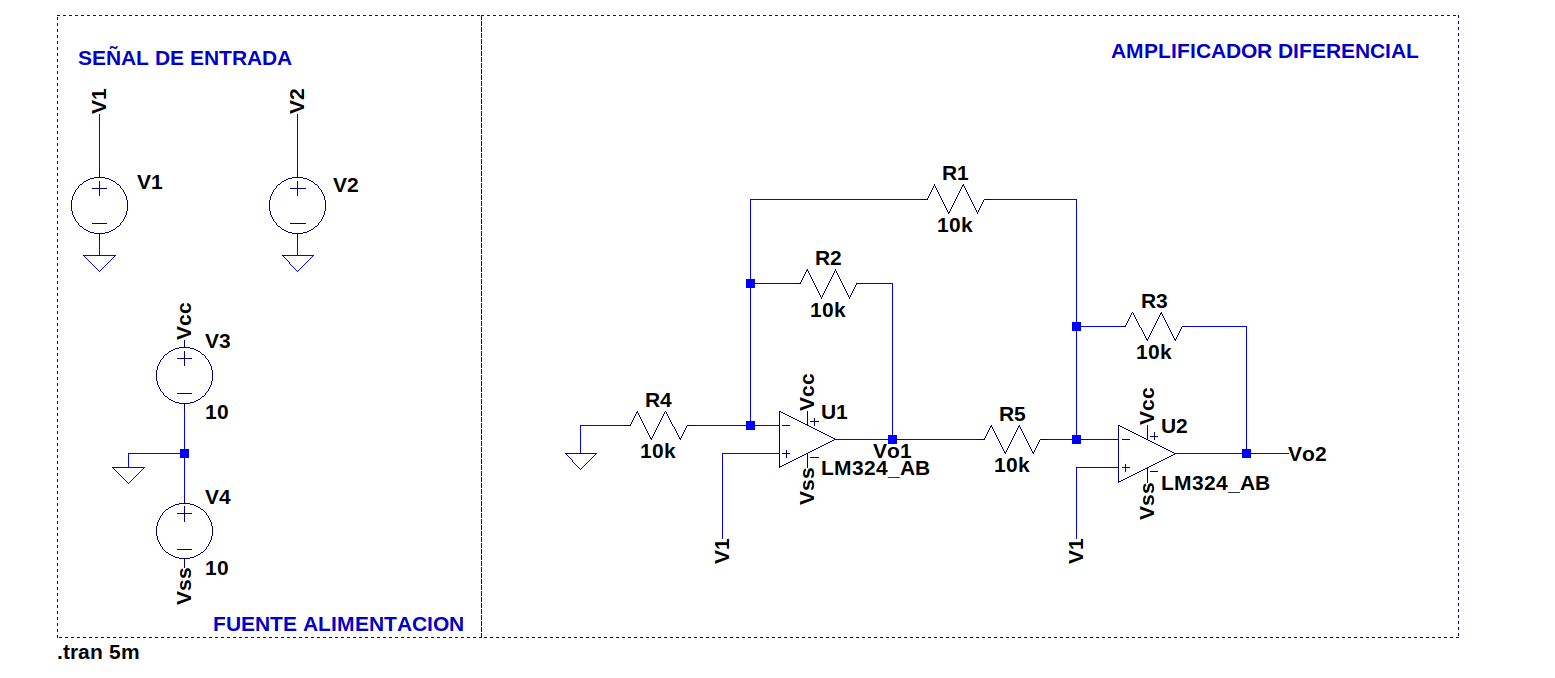

In [25]:
# import libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Barrido DC V1(v2=0)

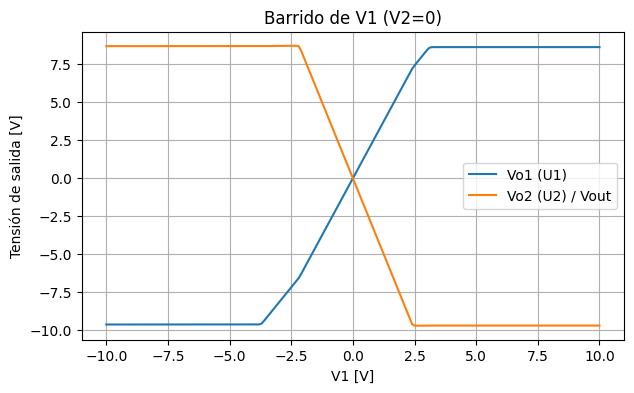

In [26]:
# Leer datos (separados por tabulaciones)
df_v1 = pd.read_csv("diffamp_V1_0.txt", sep="\t", engine="python")

# Limpiar nombres por si LTspice deja espacios
df_v1.columns = df_v1.columns.str.strip()

# Si querés, renombrá para legibilidad
df_v1 = df_v1.rename(columns={
    "v1": "V1",
    "V(vo1)": "Vo1",
    "V(vo2)": "Vo2"
})

# --- Gráfico ---
plt.figure(figsize=(7,4))
plt.plot(df_v1["V1"], df_v1["Vo1"], label="Vo1 (U1)")
plt.plot(df_v1["V1"], df_v1["Vo2"], label="Vo2 (U2) / Vout")
plt.xlabel("V1 [V]")
plt.ylabel("Tensión de salida [V]")
plt.title("Barrido de V1 (V2=0)")
plt.grid(True)
plt.legend()
plt.show()


### Barrido DC V2(v1=0)

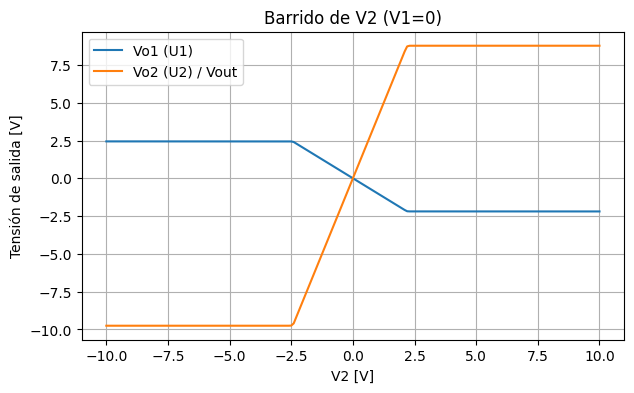

In [27]:
# Leer datos (separados por tabulaciones)
df_v2 = pd.read_csv("diffamp_V2_0.txt", sep="\t", engine="python")

# Limpiar nombres por si LTspice deja espacios
df_v2.columns = df_v2.columns.str.strip()

# Si querés, renombrá para legibilidad
df_v2 = df_v2.rename(columns={
    "v2": "V2",
    "V(vo1)": "Vo1",
    "V(vo2)": "Vo2"
})

# --- Gráfico ---
plt.figure(figsize=(7,4))
plt.plot(df_v2["V2"], df_v2["Vo1"], label="Vo1 (U1)")
plt.plot(df_v2["V2"], df_v2["Vo2"], label="Vo2 (U2) / Vout")
plt.xlabel("V2 [V]")
plt.ylabel("Tensión de salida [V]")
plt.title("Barrido de V2 (V1=0)")
plt.grid(True)
plt.legend()
plt.show()

### Barrido DC Modo comuun(v1=v2)

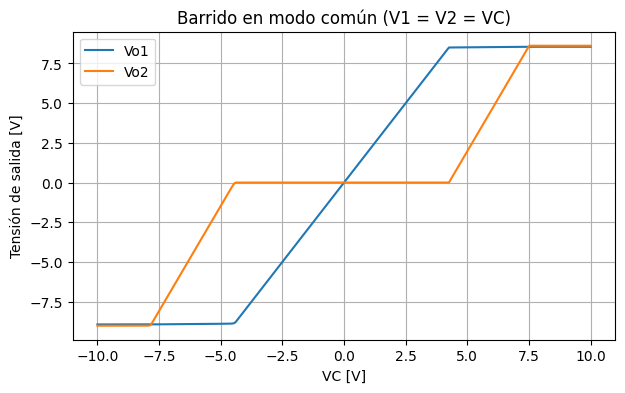

In [28]:
# Leer datos (separados por tabulaciones)
df_vc = pd.read_csv("diffamp_Vcomm.txt", sep="\t", engine="python")


# Renombrar para que sea más cómodo (ajustá si tus nombres son otros)
df_vc = df_vc.rename(columns={
    "v1": "V1",        # V1 = VC (porque estamos en modo común)
    "V(vo1)": "Vo1",
    "V(vo2)": "Vo2"
})

# Como V1 = V2 = VC, usamos V1 como eje de barrido
df_vc["VC"] = df_vc["V1"]

# --- Gráfico ---
plt.figure(figsize=(7,4))
plt.plot(df_vc["VC"], df_vc["Vo1"], label="Vo1")
plt.plot(df_vc["VC"], df_vc["Vo2"], label="Vo2")
plt.xlabel("VC [V]")
plt.ylabel("Tensión de salida [V]")
plt.title("Barrido en modo común (V1 = V2 = VC)")
plt.grid(True)
plt.legend()
plt.show()

In [29]:
# --- Cálculo de pendientes en la zona lineal ---
zona = df_vc[(df_vc["VC"] > -1) & (df_vc["VC"] < 1)]

m1, b1 = np.polyfit(zona["VC"], zona["Vo1"], 1)
m2, b2 = np.polyfit(zona["VC"], zona["Vo2"], 1)

print(f"Vo1/VC (ganancia modo común etapa 1) ≈ {m1:.2f}")
print(f"Vo2/VC (ganancia modo común salida) ≈ {m2:.2f}")

Vo1/VC (ganancia modo común etapa 1) ≈ 2.00
Vo2/VC (ganancia modo común salida) ≈ 0.00


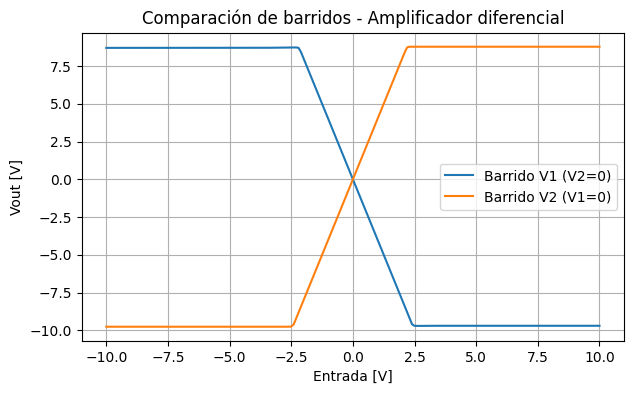

In [30]:
plt.figure(figsize=(7,4))
plt.plot(df_v1["V1"], df_v1["Vo2"], label="Barrido V1 (V2=0)")
plt.plot(df_v2["V2"], df_v2["Vo2"], label="Barrido V2 (V1=0)")
plt.xlabel("Entrada [V]")
plt.ylabel("Vout [V]")
plt.title("Comparación de barridos - Amplificador diferencial")
plt.grid(True)
plt.legend()
plt.show()

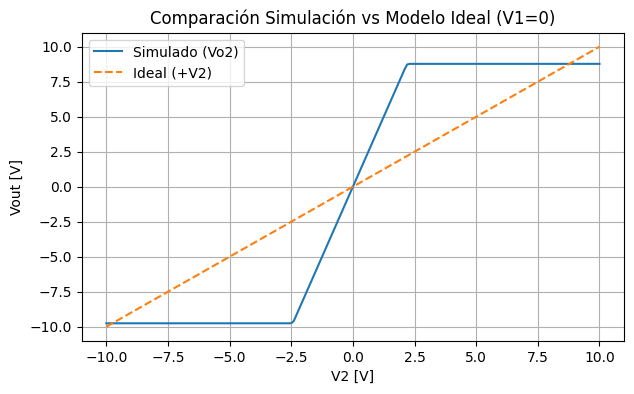

In [31]:
Vo_ideal = df_v2["V2"]  # ganancia = +1

plt.figure(figsize=(7,4))
plt.plot(df_v2["V2"], df_v2["Vo2"], label="Simulado (Vo2)")
plt.plot(df_v2["V2"], Vo_ideal, "--", label="Ideal (+V2)")
plt.xlabel("V2 [V]")
plt.ylabel("Vout [V]")
plt.title("Comparación Simulación vs Modelo Ideal (V1=0)")
plt.legend()
plt.grid(True)
plt.show()

### Modo Común Transient

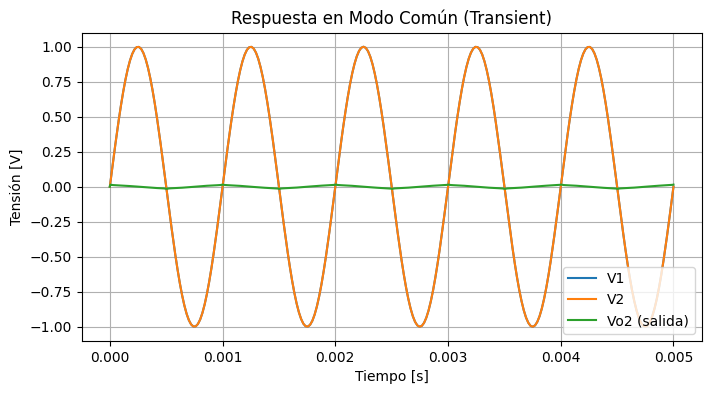

In [32]:
# Leer archivo de transient (tabulado)
df_tran = pd.read_csv("diffamp_tran_comm.txt", sep="\t", engine="python")
df_tran.columns = df_tran.columns.str.strip()

# Renombrar (ajustá los nombres según lo que te aparezca en df_tran.columns)
df_tran = df_tran.rename(columns={
    "time": "t",
    "V(v1)": "V1",
    "V(v2)": "V2",
    "V(vo1)": "Vo1",
    "V(vo2)": "Vo2"
})

# --- Gráfico de entradas y salida ---
plt.figure(figsize=(8,4))
plt.plot(df_tran["t"], df_tran["V1"], label="V1")
plt.plot(df_tran["t"], df_tran["V2"], label="V2")
plt.plot(df_tran["t"], df_tran["Vo2"], label="Vo2 (salida)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")
plt.title("Respuesta en Modo Común (Transient)")
plt.grid(True)
plt.legend()
plt.show()

### Modo Diferencial Transient

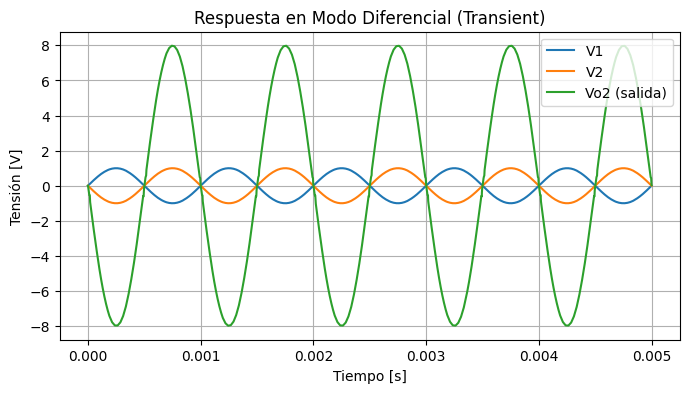

In [33]:
# Leer archivo de transient (tabulado)
df_tran = pd.read_csv("diffamp_tran_diff.txt", sep="\t", engine="python")
df_tran.columns = df_tran.columns.str.strip()

# Renombrar (ajustá los nombres según lo que te aparezca en df_tran.columns)
df_tran = df_tran.rename(columns={
    "time": "t",
    "V(v1)": "V1",
    "V(v2)": "V2",
    "V(vo1)": "Vo1",
    "V(vo2)": "Vo2"
})

# --- Gráfico de entradas y salida ---
plt.figure(figsize=(8,4))
plt.plot(df_tran["t"], df_tran["V1"], label="V1")
plt.plot(df_tran["t"], df_tran["V2"], label="V2")
plt.plot(df_tran["t"], df_tran["Vo2"], label="Vo2 (salida)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")
plt.title("Respuesta en Modo Diferencial (Transient)")
plt.grid(True)
plt.legend()
plt.show()